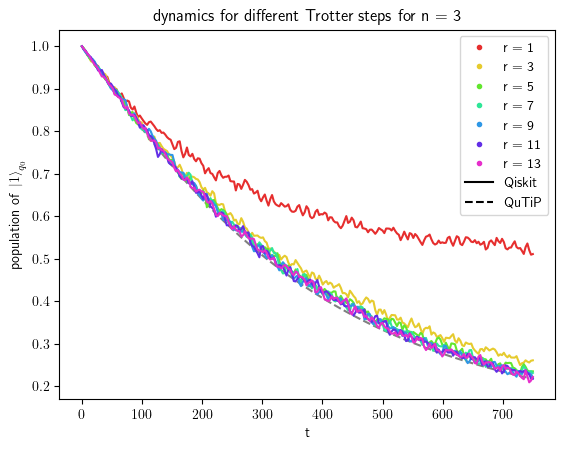

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import colorsys
import re
import scipy
plt.rcParams['text.usetex'] = True
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 600

qc_data = np.load('trotter_qc_populations.npz', allow_pickle = True)
qutip_data = np.load('markovian_populations.npz', allow_pickle = True)

qc_pops = qc_data['arr_0'].item()
qutip_pops = qutip_data['arr_0'].item()

t = np.linspace(0, 750, 250)

def generate_complementary_colors(n, palette_type='default'):

    colors = []

    hues = np.linspace(0, 1, n, endpoint=False)

    
    if palette_type == 'pastel':

        saturation = 0.4  
        value = 0.9       

    elif palette_type == 'neon':

        saturation = 1.0  
        value = 1.0       

    else:
        saturation = 0.8  
        value = 0.9       

    for h in hues:

        r, g, b = colorsys.hsv_to_rgb(h, saturation, value)

        colors.append((r, g, b))
    
    return colors

plt.plot(t, qutip_pops['n = 3']['0'], color = 'grey', linestyle = 'dashed')
keys = list(qc_pops.keys())
plot_keys = keys[::2]

colors = generate_complementary_colors(len(plot_keys), palette_type = 'default')
counter = 0

for key in plot_keys:

    plt.plot(t, qc_pops[key]['0'], color = colors[counter], linestyle = 'solid')
    plt.plot(np.NaN, np.NaN, linestyle = 'None', marker = '.', color =  colors[counter], label = key)
    counter = counter + 1

plt.plot(np.NaN, np.NaN, linestyle = 'solid', color = 'black', label = 'Qiskit')
plt.plot(np.NaN, np.NaN, linestyle = 'dashed', color = 'black', label = 'QuTiP')
plt.xlabel('t')
plt.ylabel('population of $\\left.|1 \\right>_{q_0}$')
#plt.yscale('log')
plt.title('dynamics for different Trotter steps for n = 3')
plt.legend()
plt.savefig('markovian circuit for different trotter steps')
plt.show()



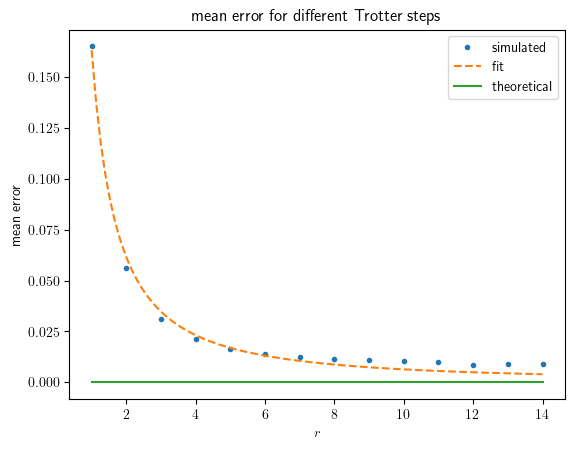

In [13]:
average_error = []
trotters = []

for key in qc_pops.keys():

    average_error.append(sum(np.abs(qc_pops[key]['0'] - qutip_pops['n = 3']['0']))/len(qc_pops[key]['0']))
    trotters.append(int(re.findall(r'\d+', key)[0]))

plt.plot(trotters, average_error, linestyle = 'None', marker = '.', label = 'simulated')

def exp_fit(x, a, b, c):
    return c + a*np.exp(b*x)

def pot_fit(x, a, b):
    return a*(x**b)

fit_exp = scipy.optimize.curve_fit(exp_fit, trotters, average_error, [0.37366037544255415, -0.8411104717534639, 0.012])
fit_pot = scipy.optimize.curve_fit(pot_fit, trotters, average_error, [0.5, 2])
a,b,c = fit_exp[0]
d,e = fit_pot[0]

x = np.linspace(1, trotters[-1], 100)
#plt.plot(x, exp_fit(x, a,b,c), linestyle = 'dashed', label = 'exp fit')
plt.plot(x, pot_fit(x, d, e), linestyle = 'dashed', label = 'fit')
#plt.plot(x, (1/(2*(x**2))), label = 'expected')

########

omega_c = 1.1
n = 3
kappa = [0.2]
omega_m = [1.1]*n
g = [0.01]*(2*(n-1))
gamma = [0.8*(10**-6)]*n
initial_state = [0]*(2**n)
initial_state[-1] = 1

delta = [ x - omega_c for x in omega_m ]

omega_eff = [ omega_m[i] + (delta[i]*(g[i]**2))/((0.5*kappa[0])**2 + delta[i]**2) for i in range(n) ]

g_eff = [ (0.5*g[i]*g[i+1]*(delta[i] + delta[i+1]))/((kappa[0]/2)**2 + delta[i]*delta[i+1]) for i in range(n-1) ]

t_end = 750

plt.plot(x, (1/x)*(2**n)*(g_eff[0]*g_eff[1])*(t_end**2), label = 'theoretical')

plt.xlabel('$r$')
plt.ylabel('mean error')
plt.title('mean error for different Trotter steps')
#plt.savefig('mean error for different trotter steps')
plt.legend()
plt.show()

In [6]:
g_eff[0]

SyntaxError: incomplete input (218810114.py, line 1)

In [ ]:
(2**n)*(g_eff[0]*g_eff[1])*(t_end**2)